# Natural Language Processing Mid-Term Project


## 1. Introduction

### Domain-Specific area


For this coursework, I have decided to do sentiment analysis on user reviews. The domain that I specifically will touch on is the travel industry. In this day and age, online travel and booking websites are widely used by tourists as it has information on hotels, restaurants and activities around the world and it includes reviews of the places visited by users  who had already visited them. The travel industry has experienced an exponential increase in demand ever since the World Health Organization (WHO) declared that “Covid-19 is no longer a global health emergency”.[1] This led to a significant increase in the number of people accessing websites to research and make reservations for their travel plans.  Reviews about a place carries a significant importance in helping an interested party decide whether to visit a place or not. With sentiment analysis on the reviews made by the tourists, we can assist interested parties in picking their choice of visit according to the sentiment of the review on the place made by people who have already visited the place and at the same time help businesses improve their business accordingly to receive better reviews which will in turn generate more revenue and visits by people. 

### Objectives

The objectives of this project is to build a deep neural network model that is able to conduct a sentiment analysis on a dataset of reviews with a high degree of accuracy, producing reasonable results. I will use a Jupyter notebook to create the model. To measure the quality of the model and its results, I will build a basic baseline model and compare the evaluation of it with the deep neural network model. This ensures a thorough evaluation of the deep neural network model. Through sentiment analysis, the model will be able to categorise the sentiment of the review made, whether it is a positive review or a negative review. This will help business owners improve their businesses accordingly and also assist tourists in making informed decisions about places to visit. If the place has positive reviews, business owners will know that they are doing something right about managing their place and can continue in doing so and if there are negative reviews, business owners can study the reviews and make improvements upon their establishment to increase the positive reviews of the place to attract more people. Tourists would highly likely visit a place if it has positive reviews and avoid a place if the place has negative reviews. This piece of technology will greatly benefit both tourists and business owners.

### Dataset


The dataset chosen for this project is the Tripadvisor Hotel Reviews dataset which can be acquired on kaggle. The reason why I chose this dataset is because I find it to be highly suitable for my coursework as it is a dataset taken from TripAdvisor, a reputable travel information website that contains a host of reviews of places people have visited which is exactly what I wanted to do for this project. This dataset consists of over 20,491 unique hotel reviews from tripadvisor and has a size of about 5MB. The file is in the format of CSV, making it convenient to be loaded into the Jupyter notebook. It is small in size and contains a sufficient amount of reviews for sentiment analysis to be done.[2] The dataset has five different categories for the ratings. They are 1,2,3,4 and 5. However, I plan to group and categorise the ratings accordingly so that it is more readable and efficient. I will further discuss about it in the implementation, preprocessing section of this report. 

### Evaluation Methodology


As discussed in the aforementioned objectives section, I will create a baseline model and use it to compare its performance with the deep neural network model. The methodologies that I plan to employ is the precision score, accuracy, recall, F1 score and display the confusion matrix. As long as the deep neural network performs better than the baseline model, I can call it a success.

Precision measures the number of true positives against the total number of positive predictions. A high precision means that the model is precise in classifying its predictions. Thus, a high precision score means that the model is performing well.

The accuracy score counts the number of correct predictions made by the model against the total number of predictions made. The higher accuracy the model has, the better it is. Thus, it is ideal for a model to have a high accuracy.

The recall score measures the number of true positives against the total number of all the positive predictions. This evaluates the rate of correct predictions made by the model. The higher the recall score, the better the performance of the model.

F1 score measures the balance of the model by taking into account the recall and precision score. It produces a value between 0 and 1. The higher the value the better it is. It means that the is balanced in classifying all its labels. This helps in finding out if the dataset used for the model is balanced or not aswell.

The confusion matrix visualises the performance of the model, displaying the true positives, true negatives, false positives and false negatives.


## 2. Implementation

### Preprocessing
For preprocessing of data, I decided to first transform the 'Rating' of the reviews. Next, using WordNet to lemmatize the reviews before finally utilising the bag of words method, count vectorizer to extract features from the data. I will further elaborate the steps mentioned here below.

In [1]:
# import relevant libraries
import nltk
import pandas as pd
from nltk.stem.wordnet import WordNetLemmatizer
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize 
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# loading the csv file
reviews = pd.read_csv("tripadvisor_hotel_reviews.csv")

In [3]:
reviews.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


The output below shows that there is no null data in this dataset

In [5]:
reviews.isnull().sum()

Review    0
Rating    0
dtype: int64

There is a total of 20491 reviews in this dataset

In [6]:
len(reviews)

20491

#### Rating Classifier

As seen below, there 5 different type of ratings. To generalise and make the dataset more readable, I will group and categorise the ratings into positive, neutral and negative. They will be classified as follows, if the rating is more than 3, it is classified as positive. If it is three, it is classified as neutral and if it is lesser than 3, it will be classified as negative.   

In [7]:
reviews['Rating'].unique()

array([4, 2, 3, 5, 1], dtype=int64)

In [8]:
# This is the helper function for the rating
def categoriser(rating):
    if rating > 3:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

In [9]:
# applying the new ratings on the dataset
reviews["Rating"]=reviews["Rating"].apply(categoriser)

The table below shows the newly applied rating categoriser

In [10]:
reviews.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,Positive
1,ok nothing special charge diamond member hilto...,Negative
2,nice rooms not 4* experience hotel monaco seat...,Neutral
3,"unique, great stay, wonderful time hotel monac...",Positive
4,"great stay great stay, went seahawk game aweso...",Positive


#### Lemmatization
The reason why I chose to lemmatize the words is because it reduce the words to the root without taking away the meaning of the word unlike stemming which could render the word meaningless. 

In [11]:
# initialise the labels
labels = reviews['Rating']

In [12]:
# initialise the reviews
REV=reviews["Review"]

In [13]:
#below is the helper function for lemmatizing
lemmatizer = WordNetLemmatizer()
def lemmatize_func(text):
    stopw = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    remove_stop = [w for w in words if not w.lower() in stopw]
    word = [lemmatizer.lemmatize(w, 'v') for w in remove_stop]
    return ' '.join(word)

In [14]:
# apply the lemmatization to the reviews
REV= REV.apply(lemmatize_func)

Below, we compare a review from before it was lemmatized vs after it was lemmatized and it is noticable that there are differences in the review after it was lemmatized.

In [15]:
# review before lemmatization
print(reviews['Review'][0])

nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  


In [16]:
# review after lemmatization
print(REV[0])

nice hotel expensive park get good deal stay hotel anniversary , arrive late even take advice previous review valet park , check quick easy , little disappoint non-existent view room room clean nice size , bed comfortable wake stiff neck high pillow , soundproof like hear music room night morning loud bang doors open close hear people talk hallway , maybe noisy neighbor , aveda bath products nice , goldfish stay nice touch take advantage stay longer , location great walk distance shop , overall nice experience pay 40 park night ,


#### Feature Extraction 
For feature extraction, I used a bag of words method, count vectorizer. The count vectorizer counts every distinct word that occurs in the dataset. It converts the text into numerals which then enable the converted texts to be evaluated by a machine learning algorithm.  

In [17]:
# Count vectorizer function
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(REV)
#print(reviews["Review"])
rev_vector = vectorizer.transform(REV)

In [18]:
rev_vector.shape

(20491, 48209)

### Baseline performance

The classifier that I have chose to build for the baseline is the Multinomial Naive Bayes (MNB) model. This is because firstly, MNB is a probabilistic classifier that is able to classify a text to a sentiment class. Since this is a sentiment analysis which is technically a text classification problem, MNB is suitable for this task. Secondly, MNB can work well with data that is preprocessed in a bag-of-words method. Since I am using a bag-of-words method to preprocess the dataset, MNB is suitable for this. I believe that with this two reasons, it is convincing enough for me to to use the MNB model to carry out this task.

The object rev_vector contains all the reviews in the dataset. The object labels contains all the ratings of the reviews in the dataset. These will be the feature and label respectively for the classifier.

To carry out the classification first we have to split the dataset into train and test sets. Thereafter, I will train the MNB model using the train dataset and evaluate the model on the test set.

In [19]:
#Splitting the data into trainig and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(rev_vector, labels, test_size=0.20, random_state=5)
#Training the model

In [20]:
# creating the model
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
#Caluclating the accuracy score of the model
from sklearn import metrics
predictedMNB = MNB.predict(X_test)
accuracy_score_base = metrics.accuracy_score(predictedMNB, Y_test)
print("Accuracy Score: ",accuracy_score_base)

Accuracy Score:  0.8404488899731641


In [21]:
print(X_train.shape)
print(Y_train.shape)

(16392, 48209)
(16392,)


The model has an accuracy score of 0.84. This sets the baseline score at 0.84. This means that the model that I have to build for the classification has to have a score higher than 0.84 to be considered a success.

In [22]:
# helper function to predict text sentiment using MNB
def predictMNB(text):
    lemma = lemmatize_func(text)
    token = vectorizer.transform([lemma])
    pred = MNB.predict(token)
    return pred

### Classification approach
For my classification approach, I will build a deep neural network. The objective of this neural network is to successfully perform better than the baseline model and be able to successfully classify the sentiments of the texts. Naturally, a deep neural network is able to perform better than any pre built models hence, my decision to build a neural network for the sentiment analysis

In [23]:
# import the relevant libraries
import tensorflow as tf
from keras.models import Sequential
from keras import layers,models
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelBinarizer

The neural network is only able to process numeric objects thus, we have to convert the labels from string to numeric type for the neural network to work. I will use LabelBinarizer to assist in converting the labels.

In [24]:
# converting the labels into useable type
lb = LabelBinarizer()
Y_train_bin = lb.fit_transform(Y_train)
Y_test_bin = lb.transform(Y_test)

Below shows the different distinct type of labels.

In [25]:
lb.classes_

array(['Negative', 'Neutral', 'Positive'], dtype='<U8')

In [26]:
shape=X_train.shape[1]

The neural network consists of four dense layers with relu activation. Each dense layer is followed by a dropout layer. The output layer is a dense layer that uses a softmax activation and a value of three because the model is used for a multi label classification problem with three different type of labels, Negative, Neutral and Positive.

In [27]:
# building network
model = Sequential()
model.add(layers.Dense(64, activation = "relu", input_shape=(shape,))),
model.add(layers.Dropout(0.8)),
model.add(layers.Dense(64, activation = "relu")),
model.add(layers.Dropout(0.2)),
model.add(layers.Dense(18, activation = "relu")),
model.add(layers.Dropout(0.2)),
model.add(layers.Dense(3,activation = "softmax"))


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3085440   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 18)                1170      
                                                                 
 dropout_2 (Dropout)         (None, 18)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 5

Model is compiled with adam optimizer and uses a categorical_crossentropy for its loss function.

In [29]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

Model is trained for 5 epochs

In [30]:
history=model.fit(X_train, Y_train_bin, epochs = 5)

Epoch 1/5


C:\Users\Imaddin\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


513/513 [==============================] - 18s 33ms/step - loss: 0.6041 - accuracy: 0.7745
Epoch 2/5
513/513 [==============================] - 17s 34ms/step - loss: 0.4559 - accuracy: 0.8342
Epoch 3/5
513/513 [==============================] - 17s 34ms/step - loss: 0.4198 - accuracy: 0.8404
Epoch 4/5
513/513 [==============================] - 17s 34ms/step - loss: 0.3924 - accuracy: 0.8466
Epoch 5/5
513/513 [==============================] - 18s 34ms/step - loss: 0.3704 - accuracy: 0.8512


## 3. Conclusions

### Evaluation

For the evaluation, I will use the classificiation report and confusion matrix that will display the precison, recall, f1 score and accuracy of the model. I will also perform an example of using the model to evaluate a custom review to determine its sentiment. First I will evaluate the baseline model, followed by the deep neural model

In [31]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#### Evaluation and comparison of the models

In [32]:
pred_dnn = model.predict(X_test)

129/129 [==============================] - 0s 2ms/step


In [33]:
Y_labels = np.argmax(Y_test_bin, axis=1)
predDnn_labels = np.argmax(pred_dnn, axis=1)
conf_mat = confusion_matrix(Y_labels,predDnn_labels)
print("Classification report for baseline: \n\n", classification_report(Y_test, predictedMNB))
print("Classification report for deep neural network: \n\n",classification_report(Y_labels, predDnn_labels))

Classification report for baseline: 

               precision    recall  f1-score   support

    Negative       0.78      0.74      0.76       647
     Neutral       0.27      0.06      0.10       420
    Positive       0.87      0.97      0.92      3032

    accuracy                           0.84      4099
   macro avg       0.64      0.59      0.59      4099
weighted avg       0.79      0.84      0.81      4099

Classification report for deep neural network: 

               precision    recall  f1-score   support

           0       0.73      0.82      0.77       647
           1       0.46      0.04      0.07       420
           2       0.89      0.98      0.93      3032

    accuracy                           0.86      4099
   macro avg       0.69      0.61      0.59      4099
weighted avg       0.82      0.86      0.82      4099



From the classification report of the models above we can compare the performance of the models. For the comparison I will use the macro avg value to compare the precision, recall and f1-score

The average precision score of the baseline model is 0.64 whereas the average precision score for the deep neural network is 0.69. The deep neural network has a better precision than the baseline from this comparison. This means that the deep neural network is more precise at classifying its predictions.

For recall score, the deep neural network has a higher average recall score than the baseline model with a score of 0.61 over the baseline model's score of 0.59. Again the deep neural network performs better than the baseline model. This means that the neural network has a better rate of correct predicitions than the baseline model

The average f1 score of the baseline model is 0.59 and the deep neural network is also 0.59. This means that both models have the same level of balance between its classes.

Lastly, the accuracy of the baseline model is 0.84 and the accuracy of the deep neural network model is 0.86. The deep neural network is more accurate than the baseline model. 

To summarise the findings here, the deep neural network outperforms the baseline model in almost every aspect of the evaluation metrics. From this, I can safely say that the deep neural network is a success as it performs better than the baseline and that I have met my objective that I set out to create a model that is better than the baseline.

The output below shows the confusion matrix of the deep neural network model

<Figure size 576x432 with 0 Axes>

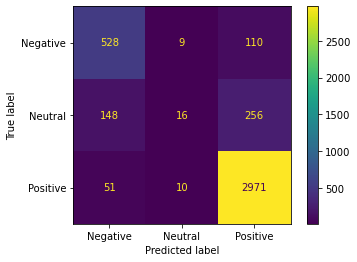

In [34]:
# print confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

plt.figure(figsize=(8,6))
display=metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels=lb.classes_)
display.plot()
plt.show()

#### Example of sentiment prediction on custom reviews

In [35]:
# helper function to predict text sentiment using the neural network
def sent_pred(text):
    lemma = lemmatize_func(text)
    clean = vectorizer.transform([lemma])
    pred = model.predict(clean)
    result = lb.inverse_transform(pred)[0]
    return result

The text below is expected to have a neutral sentiment. The neural network model correctly predicts the sentiment but the baseline model wrongly predicts the sentiment of the review.

In [40]:
text = "Good food but location is too far"
print("Neural network prediction: ", sent_pred(text))
print("Baseline model prediction: ", predictMNB(text))

1/1 [==============================] - 0s 8ms/step
Neural network prediction:  Neutral
Baseline model prediction:  ['Positive']


The text below is expected to have a positive sentiment. Both the neural network model and baseline model correctly predicts the sentiment.

In [37]:
text2 = "This place is great"
print("Neural network prediction: ", sent_pred(text2))
print("Baseline model prediction: ", predictMNB(text2))

1/1 [==============================] - 0s 15ms/step
Neural network prediction:  Positive
Baseline model prediction:  ['Positive']


The text below is expected to have a negative sentiment. The neural network model correctly predicts the sentiment but the baseline model wrongly predicts the sentiment of the review

In [38]:
text4 = "I hate this place bad service all round"
print("Neural network prediction: ", sent_pred(text4))
print("Baseline model prediction: ", predictMNB(text4))

1/1 [==============================] - 0s 15ms/step
Neural network prediction:  Negative
Baseline model prediction:  ['Positive']


From the above comparisons done, it again shows that the neural network performs better than the baseline model. I can confidently conclude that the neural network model is better than the baseline model and that it is a success.

### Summary and conclusions

In light of the results obtained, the model can be used in the tourism industry by business owners to evaluate the sentiments of the reviews done by their customers or visitors. Through this, they will be able to quickly derive the sentiment and improve their business accordingly if they had a bad review. Another domain which this model can be applied to and potentially assist is the food and beverage industry where this model can be applied to evaluate the sentiment of their reviewers and improve their food and service accordingly.

In conclusion, from the evaluations made, this model that I have created is a success as it can classify the sentiments of the reviews successfully at a high accuracy. I am satisfied with its performance and I believe that it can help with the interested parties in their needs. Given more time and resources, the improvements that I would make to increase its performance is by increasing the number of layers and the number of training epochs and combining a Long Short Term Memory (LSTM) model into this current model would definitely increase the performance of this model. LSTM is a recurrent neural network that is designed suitable for sentiment analysis.

## References

1 Covid-19 is no longer global health emergency: WHO. (2023). The Straits Times. [online] 5 May. Available at: https://www.straitstimes.com/world/europe/covid-19-is-no-longer-global-health-emergency-who.

2 www.kaggle.com. (n.d.). Trip Advisor Hotel Reviews. [online] Available at: https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews.